<a href="https://colab.research.google.com/github/tedblackson/Stock-Price-Predictor/blob/Models/Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Stock Price Prediction Using Long Short Term Memory

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import io

In [ ]:
from google.colab.files import upload

uploaded = upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [ ]:
dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))


In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff63b710b50>,
      dtype=object)

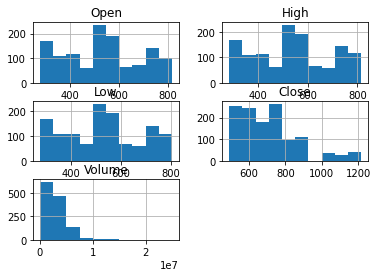

In [ ]:
dataset_train.hist()

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
Y_train = []

for i in range(60, 1258):
    X_train.append(scaled_training_set[i - 60 : i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)
    
    
    


(1198, 60)
(1198,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 114ms/step - loss: 0.0489
Epoch 2/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 7s 196ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0037
Epoch 13/100

In [ ]:
regressor.save('StockPricePredictorLSTM')

In [ ]:
dataset_test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))

In [ ]:
actual_stock_price = dataset_test.iloc[:, 1:2].values
actual_stock_price = actual_stock_price[:21]

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i - 60 :i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
from keras.models import load_model

regressor = load_model('StockPricePredictorLSTM')





1/1 [==============================] - 2s 2s/step


In [ ]:
# scores = regressor.evaluate( actual_stock_price, predicted_stock_price, batch_size = 128)
# print(scores)

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 46ms/step


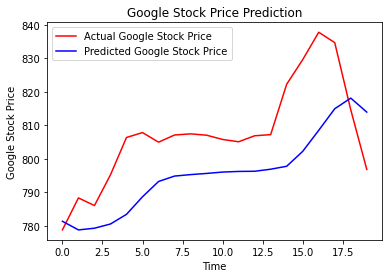

In [ ]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

plt.legend()




In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mean_absolute_error(actual_stock_price[:20], predicted_stock_price)

14.211115234375

In [ ]:
mean_squared_error(actual_stock_price[:20], predicted_stock_price)

255.55152881084535

In [ ]:
regressor.metrics_names

['loss']

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(actual_stock_price[:20], predicted_stock_price)
r2

-0.1758163966288706